<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
 
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.881160,41.302718,46.862244,25.420888,182.467010,161.964951,20.502059
1,0.0,1.0,26.496565,23.023440,32.527318,30.607406,122.654730,96.158353,26.496377
2,0.0,2.0,47.073419,93.881477,71.845904,-112.985304,109.815497,175.459891,-65.644394
3,0.0,3.0,71.571053,23.882533,87.357541,6.488620,199.299747,191.274473,8.025274
4,0.0,4.0,68.576701,44.673959,34.526890,-54.362778,103.414771,174.077476,-70.662705
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,54.745394,21.901538,22.503425,7.357451,116.507807,98.123669,18.384138
29996,999.0,26.0,93.708936,48.783147,47.926863,-31.105977,169.312969,227.213173,-57.900205
29997,999.0,27.0,33.707840,62.976851,97.114345,-89.146969,114.652067,194.815365,-80.163298
29998,999.0,28.0,28.072240,85.795593,71.135868,-116.199091,78.804608,166.227686,-87.423077


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.881160,41.302718,46.862244,25.420888,182.467010,161.964951,20.502059
1,0.0,1.0,26.496565,23.023440,32.527318,30.607406,122.654730,96.158353,26.496377
2,0.0,2.0,47.073419,93.881477,71.845904,-112.985304,109.815497,175.459891,-65.644394
3,0.0,3.0,71.571053,23.882533,87.357541,6.488620,199.299747,191.274473,8.025274
4,0.0,4.0,68.576701,44.673959,34.526890,-54.362778,103.414771,174.077476,-70.662705
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,54.745394,21.901538,22.503425,7.357451,116.507807,98.123669,18.384138
29996,999.0,26.0,93.708936,48.783147,47.926863,-31.105977,169.312969,227.213173,-57.900205
29997,999.0,27.0,33.707840,62.976851,97.114345,-89.146969,114.652067,194.815365,-80.163298
29998,999.0,28.0,28.072240,85.795593,71.135868,-116.199091,78.804608,166.227686,-87.423077


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    58.881160  41.302718  46.862244   25.420888  182.467010   
      1.0    26.496565  23.023440  32.527318   30.607406  122.654730   
      2.0    47.073419  93.881477  71.845904 -112.985304  109.815497   
      3.0    71.571053  23.882533  87.357541    6.488620  199.299747   
      4.0    68.576701  44.673959  34.526890  -54.362778  103.414771   
...                ...        ...        ...         ...         ...   
999.0 25.0   54.745394  21.901538  22.503425    7.357451  116.507807   
      26.0   93.708936  48.783147  47.926863  -31.105977  169.312969   
      27.0   33.707840  62.976851  97.114345  -89.146969  114.652067   
      28.0   28.072240  85.795593  71.135868 -116.199091   78.804608   
      29.0   91.369882  44.884178  34.331211   53.107241  233.692512   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    161.964951  20.502059  
      1.0     96.158353  26.496377  
      2.0    175.459891 -65.644394  
      3.0    191.274473   8.025274  
      4.0    174.077476 -70.662705  
...                 ...        ...  
999.0 25.0    98.123669  18.384138  
      26.0   227.213173 -57.900205  
      27.0   194.815365 -80.163298  
      28.0   166.227686 -87.423077  
      29.0   200.912362  32.780150  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    58.881160  41.302718  46.862244   25.420888  182.467010   
      1.0    26.496565  23.023440  32.527318   30.607406  122.654730   
      2.0    47.073419  93.881477  71.845904 -112.985304  109.815497   
      3.0    71.571053  23.882533  87.357541    6.488620  199.299747   
      4.0    68.576701  44.673959  34.526890  -54.362778  103.414771   
...                ...        ...        ...         ...         ...   
999.0 25.0   54.745394  21.901538  22.503425    7.357451  116.507807   
      26.0   93.708936  48.783147  47.926863  -31.105977  169.312969   
      27.0   33.707840  62.976851  97.114345  -89.146969  114.652067   
      28.0   28.072240  85.795593  71.135868 -116.199091   78.804608   
      29.0   91.369882  44.884178  34.331211   53.107241  233.692512   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    161.964951  20.502059  
      1.0     96.158353  26.496377  
      2.0    175.459891 -65.644394  
      3.0    191.274473   8.025274  
      4.0    174.077476 -70.662705  
...                 ...        ...  
999.0 25.0    98.123669  18.384138  
      26.0   227.213173 -57.900205  
      27.0   194.815365 -80.163298  
      28.0   166.227686 -87.423077  
      29.0   200.912362  32.780150  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.881160,41.302718,46.862244,25.420888,182.467010,161.964951,20.502059
1,0.0,1.0,26.496565,23.023440,32.527318,30.607406,122.654730,96.158353,26.496377
2,0.0,2.0,47.073419,93.881477,71.845904,-112.985304,109.815497,175.459891,-65.644394
3,0.0,3.0,71.571053,23.882533,87.357541,6.488620,199.299747,191.274473,8.025274
4,0.0,4.0,68.576701,44.673959,34.526890,-54.362778,103.414771,174.077476,-70.662705
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,54.745394,21.901538,22.503425,7.357451,116.507807,98.123669,18.384138
29996,999.0,26.0,93.708936,48.783147,47.926863,-31.105977,169.312969,227.213173,-57.900205
29997,999.0,27.0,33.707840,62.976851,97.114345,-89.146969,114.652067,194.815365,-80.163298
29998,999.0,28.0,28.072240,85.795593,71.135868,-116.199091,78.804608,166.227686,-87.423077


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    58.881160  41.302718  46.862244   25.420888  182.467010   
      1.0    26.496565  23.023440  32.527318   30.607406  122.654730   
      2.0    47.073419  93.881477  71.845904 -112.985304  109.815497   
      3.0    71.571053  23.882533  87.357541    6.488620  199.299747   
      4.0    68.576701  44.673959  34.526890  -54.362778  103.414771   
...                ...        ...        ...         ...         ...   
999.0 25.0   54.745394  21.901538  22.503425    7.357451  116.507807   
      26.0   93.708936  48.783147  47.926863  -31.105977  169.312969   
      27.0   33.707840  62.976851  97.114345  -89.146969  114.652067   
      28.0   28.072240  85.795593  71.135868 -116.199091   78.804608   
      29.0   91.369882  44.884178  34.331211   53.107241  233.692512   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    161.964951  20.502059  
      1.0     96.158353  26.496377  
      2.0    175.459891 -65.644394  
      3.0    191.274473   8.025274  
      4.0    174.077476 -70.662705  
...                 ...        ...  
999.0 25.0    98.123669  18.384138  
      26.0   227.213173 -57.900205  
      27.0   194.815365 -80.163298  
      28.0   166.227686 -87.423077  
      29.0   200.912362  32.780150  

[30000 rows x 7 columns]

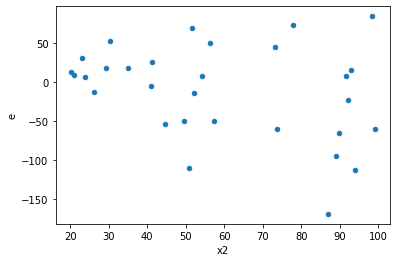

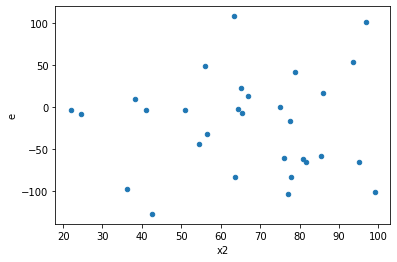

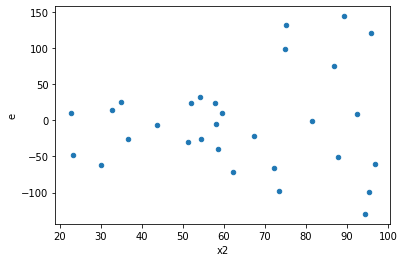

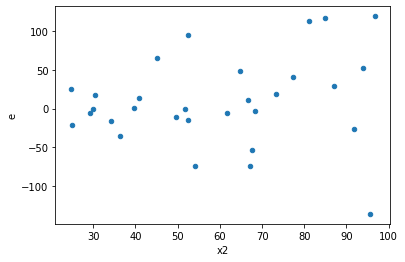

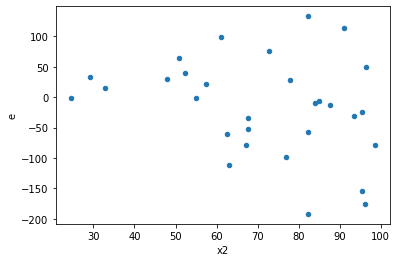

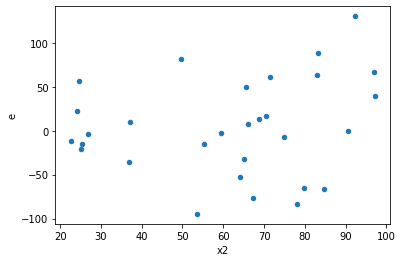

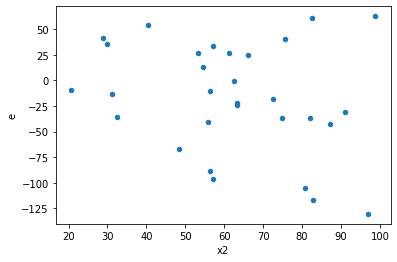

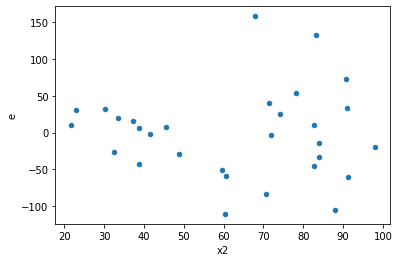

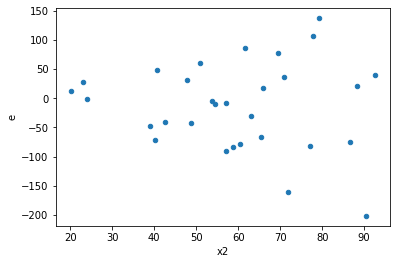

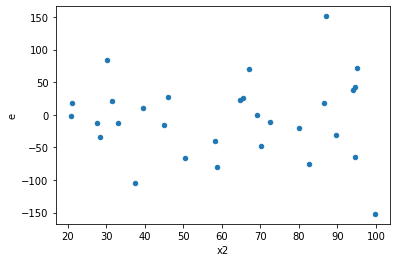

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,30849.195761783612,31464.26993208742,3427.688417975957,3496.0299924541578,1.019938094174428,0.977021680325953,0.5114891598370235,0.4885108401629765,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,29511.506069570794,35960.67379550425,3279.0562299523103,3995.6304217226943,1.2185306202513049,0.7732429524642614,0.6133785237678693,0.3866214762321307,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,10298.564203948301,69812.6196808008,1144.284911549811,7756.9577423112,6.778869199459454,0.008808618281324065,0.995595690859338,0.004404309140662033,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,7217.738828609406,52172.72363586099,801.9709809566007,5796.969292873443,7.22840281073356,0.00699414329939918,0.9965029283503004,0.00349707164969959,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,28433.58706275203,71071.02727495958,3159.2874514168925,7896.780808328842,2.4995448909807987,0.18853910353638081,0.9057304482318096,0.09426955176819041,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,21987.83768177857,27122.28637160209,2443.093075753174,3013.5873746224547,1.2335131250345035,0.7596651648378754,0.6201674175810623,0.3798325824189377,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,15838.198018107865,52408.60408565341,1759.7997797897629,5823.178231739268,3.3090004321031015,0.08931496295108898,0.9553425185244555,0.04465748147554449,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,28445.089768947288,73572.76554031824,3160.565529883032,8174.751726702027,2.58648385847724,0.1730847650003815,0.9134576174998092,0.08654238250019075,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,19346.629739271113,38015.09710153124,2149.6255265856794,4223.899677947916,1.9649467433785428,0.3287536217041096,0.8356231891479452,0.1643768108520548,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,30849.195761783612,31464.26993208742,3427.688417975957,3496.0299924541578,1.019938094174428,0.977021680325953,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,29511.506069570794,35960.67379550425,3279.0562299523103,3995.6304217226943,1.2185306202513049,0.7732429524642614,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,10298.564203948301,69812.6196808008,1144.284911549811,7756.9577423112,6.778869199459454,0.008808618281324065,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,7217.738828609406,52172.72363586099,801.9709809566007,5796.969292873443,7.22840281073356,0.00699414329939918,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,28433.58706275203,71071.02727495958,3159.2874514168925,7896.780808328842,2.4995448909807987,0.18853910353638081,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,21987.83768177857,27122.28637160209,2443.093075753174,3013.5873746224547,1.2335131250345035,0.7596651648378754,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,32385.820361927883,18544.180585330312,3598.4244846586535,2060.464509481146,0.572601847910281,0.41882984759717273,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,15838.198018107865,52408.60408565341,1759.7997797897629,5823.178231739268,3.3090004321031015,0.08931496295108898,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,28445.089768947288,73572.76554031824,3160.565529883032,8174.751726702027,2.58648385847724,0.1730847650003815,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      712
Reject005=0 : Heteroscedasticity    288
Name: Result_test, dtype: int64